In [1]:
## https://lashlock.github.io/compbio/R_presentation.html

In [2]:
# Store current verbose option
suppressPackageStartupMessages({
    library(DESeq2,quietly = TRUE)
    library(ggplot2,quietly = TRUE)
    library(pheatmap)
})

## read input count data

In [3]:
countData <- read.csv('all_samples_count.tsv', header = TRUE, sep = "\t")
head(countData)

,target_id,B1,B2,B3,B4,B5,B6,B7,B8,B9,⋯,rerun_V1,rerun_V10,rerun_V2,rerun_V3,rerun_V4,rerun_V5,rerun_V6,rerun_V7,rerun_V8,rerun_V9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NLLv2_murdoch00001.1,0,0,0,0,0.00000,0,0,2.00000,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NLLv2_murdoch00002.1,0,0,1,0,3.00345,0,0,1.00145,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NLLv2_murdoch00003.1,3931,2906,3956,4152,2883.00000,5299,7927,3312.00000,5474,⋯,1358,1587,2922,782,742,1139,1150,1293,1318,1867
4,NLLv2_murdoch00004.1,137,210,262,235,297.00000,382,257,343.00000,371,⋯,116,145,317,84,34,134,131,96,77,70
5,NLLv2_murdoch00005.1,2450,3257,3071,3469,3436.00000,4203,1633,3833.00000,4673,⋯,2157,2640,4322,1313,1187,2311,2163,1391,1318,2139
6,NLLv2_murdoch00006.1,5230,4701,4664,7024,4443.00000,6101,7119,5765.00000,7070,⋯,2783,3587,6875,1639,1672,2955,2905,2775,2452,3311


## filter sample and create trait matrix

In [4]:
as.list(names(countData))

[[1]]
[1] "target_id"

[[2]]
[1] "B1"

[[3]]
[1] "B2"

[[4]]
[1] "B3"

[[5]]
[1] "B4"

[[6]]
[1] "B5"

[[7]]
[1] "B6"

[[8]]
[1] "B7"

[[9]]
[1] "B8"

[[10]]
[1] "B9"

[[11]]
[1] "S1"

[[12]]
[1] "S10"

[[13]]
[1] "S11"

[[14]]
[1] "S2"

[[15]]
[1] "S3"

[[16]]
[1] "S4"

[[17]]
[1] "S5"

[[18]]
[1] "S6"

[[19]]
[1] "S7"

[[20]]
[1] "S8"

[[21]]
[1] "S9"

[[22]]
[1] "SRR1578066_1"

[[23]]
[1] "SRR1578080_1"

[[24]]
[1] "SRR1578084_1"

[[25]]
[1] "SRR1578087_1"

[[26]]
[1] "SRR1578089_1"

[[27]]
[1] "SRR5723679_1"

[[28]]
[1] "SRR5723680_1"

[[29]]
[1] "SRR5723681_1"

[[30]]
[1] "SRR5723682_1"

[[31]]
[1] "SRR6315853_1"

[[32]]
[1] "rerun_V1"

[[33]]
[1] "rerun_V10"

[[34]]
[1] "rerun_V2"

[[35]]
[1] "rerun_V3"

[[36]]
[1] "rerun_V4"

[[37]]
[1] "rerun_V5"

[[38]]
[1] "rerun_V6"

[[39]]
[1] "rerun_V7"

[[40]]
[1] "rerun_V8"

[[41]]
[1] "rerun_V9"

In [12]:
setdiff(c(1,32:41), c(33,34))

[1]  1 32 35 36 37 38 39 40 41

In [6]:
4:7

[1] 4 5 6 7

In [13]:
column_indices_to_keep <- setdiff(c(1,32:41), c(33,34))

In [14]:
column_indices_to_keep

[1]  1 32 35 36 37 38 39 40 41

In [15]:
countData_small <- countData[, column_indices_to_keep, drop = FALSE]
#rownames(countData_small) <- countData$target_id
head(countData_small)

,target_id,rerun_V1,rerun_V3,rerun_V4,rerun_V5,rerun_V6,rerun_V7,rerun_V8,rerun_V9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NLLv2_murdoch00001.1,0,0,0,0,0,0,0,0
2,NLLv2_murdoch00002.1,0,0,0,0,0,0,0,0
3,NLLv2_murdoch00003.1,1358,782,742,1139,1150,1293,1318,1867
4,NLLv2_murdoch00004.1,116,84,34,134,131,96,77,70
5,NLLv2_murdoch00005.1,2157,1313,1187,2311,2163,1391,1318,2139
6,NLLv2_murdoch00006.1,2783,1639,1672,2955,2905,2775,2452,3311


In [16]:
# Convert numeric values to integers
countData_small_int <- countData_small
numeric_cols <- sapply(countData_small, is.numeric)  # Identify numeric columns
countData_small_int[numeric_cols] <- lapply(countData_small_int[numeric_cols], as.integer)
head(countData_small_int)

,target_id,rerun_V1,rerun_V3,rerun_V4,rerun_V5,rerun_V6,rerun_V7,rerun_V8,rerun_V9
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NLLv2_murdoch00001.1,0,0,0,0,0,0,0,0
2,NLLv2_murdoch00002.1,0,0,0,0,0,0,0,0
3,NLLv2_murdoch00003.1,1358,782,742,1139,1150,1293,1318,1867
4,NLLv2_murdoch00004.1,116,84,34,134,131,96,77,70
5,NLLv2_murdoch00005.1,2157,1313,1187,2311,2163,1391,1318,2139
6,NLLv2_murdoch00006.1,2783,1639,1672,2955,2905,2775,2452,3311


In [17]:
colnames(countData_small)[-1]

[1] "rerun_V1" "rerun_V3" "rerun_V4" "rerun_V5" "rerun_V6" "rerun_V7" "rerun_V8"
[8] "rerun_V9"

In [18]:
# trait <- c(rep("bitter", 7), rep("sweet", 9))
trait <- c("control","control","VIGS","control","VIGS","VIGS","VIGS","VIGS")
sample_trait <- data.frame("ID" = colnames(countData_small)[-1],"trait" = trait)
head(sample_trait)

,ID,trait
,<chr>,<chr>
1,rerun_V1,control
2,rerun_V3,control
3,rerun_V4,VIGS
4,rerun_V5,control
5,rerun_V6,VIGS
6,rerun_V7,VIGS


## run DESeq

In [19]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData=countData_small_int, 
                              colData=sample_trait, 
                              design=~trait, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [20]:
dds

class: DESeqDataSet 
dim: 67183 8 
metadata(1): version
assays(1): counts
rownames(67183): NLLv2_murdoch00001.1 NLLv2_murdoch00002.1 ...
  NLLv2_murdoch53366.1 NLLv2_murdoch53367.1
rowData names(0):
colnames(8): rerun_V1 rerun_V3 ... rerun_V8 rerun_V9
colData names(2): ID trait

In [21]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [22]:
res <- results(dds)
head(results(dds, tidy=TRUE)) #let's look at the results table

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NLLv2_murdoch00001.1,0.00000,NA,NA,NA,NA,NA
2,NLLv2_murdoch00002.1,0.00000,NA,NA,NA,NA,NA
3,NLLv2_murdoch00003.1,1173.24802,0.3178204,0.16699631,1.9031583,0.05701989,0.1919948
4,NLLv2_murdoch00004.1,89.16229,-0.3721850,0.31847629,-1.1686428,0.24254757,0.4863870
5,NLLv2_murdoch00005.1,1697.07927,-0.1169134,0.15596945,-0.7495916,0.45350071,0.6975650
6,NLLv2_murdoch00006.1,2495.64298,0.2114778,0.09551545,2.2140690,0.02682403,0.1154617


In [23]:
summary(res) #summary of results


out of 55067 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4011, 7.3%
LFC < 0 (down)     : 3962, 7.2%
outliers [1]       : 422, 0.77%
low counts [2]     : 17881, 32%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [24]:
# Sort summary list by p-value
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): trait VIGS vs control 
Wald test p-value: trait VIGS vs control 
DataFrame with 6 rows and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
NLLv2_murdoch31609.1   299.840      -2.961620 0.1788898  -16.5556 1.45992e-61
NLLv2_murdoch40802.1  1573.225      -1.679205 0.1148262  -14.6239 1.97793e-48
NLLv2_murdoch46301.1  1687.606      -4.771425 0.3444907  -13.8507 1.26043e-43
NLLv2_murdoch20545.1  2695.040      -4.598217 0.3397677  -13.5334 9.93010e-42
NLLv2_murdoch29686.1   232.378       1.858551 0.1372703   13.5394 9.15937e-42
NLLv2_murdoch30867.1 19239.265       0.653569 0.0492686   13.2654 3.67334e-40
                            padj
                       <numeric>
NLLv2_murdoch31609.1 5.36724e-57
NLLv2_murdoch40802.1 3.63584e-44
NLLv2_murdoch46301.1 1.54461e-39
NLLv2_murdoch20545.1 7.30140e-38
NLLv2_murdoch29686.1 7.30140e-38
NLLv2_murdoch30867.1

In [26]:
nrow(subset(res, padj<.01 ))

[1] 3234

In [27]:
write.csv(res, "sorted_DEseq2_VIGS.csv", row.names = TRUE)

## plot Counts

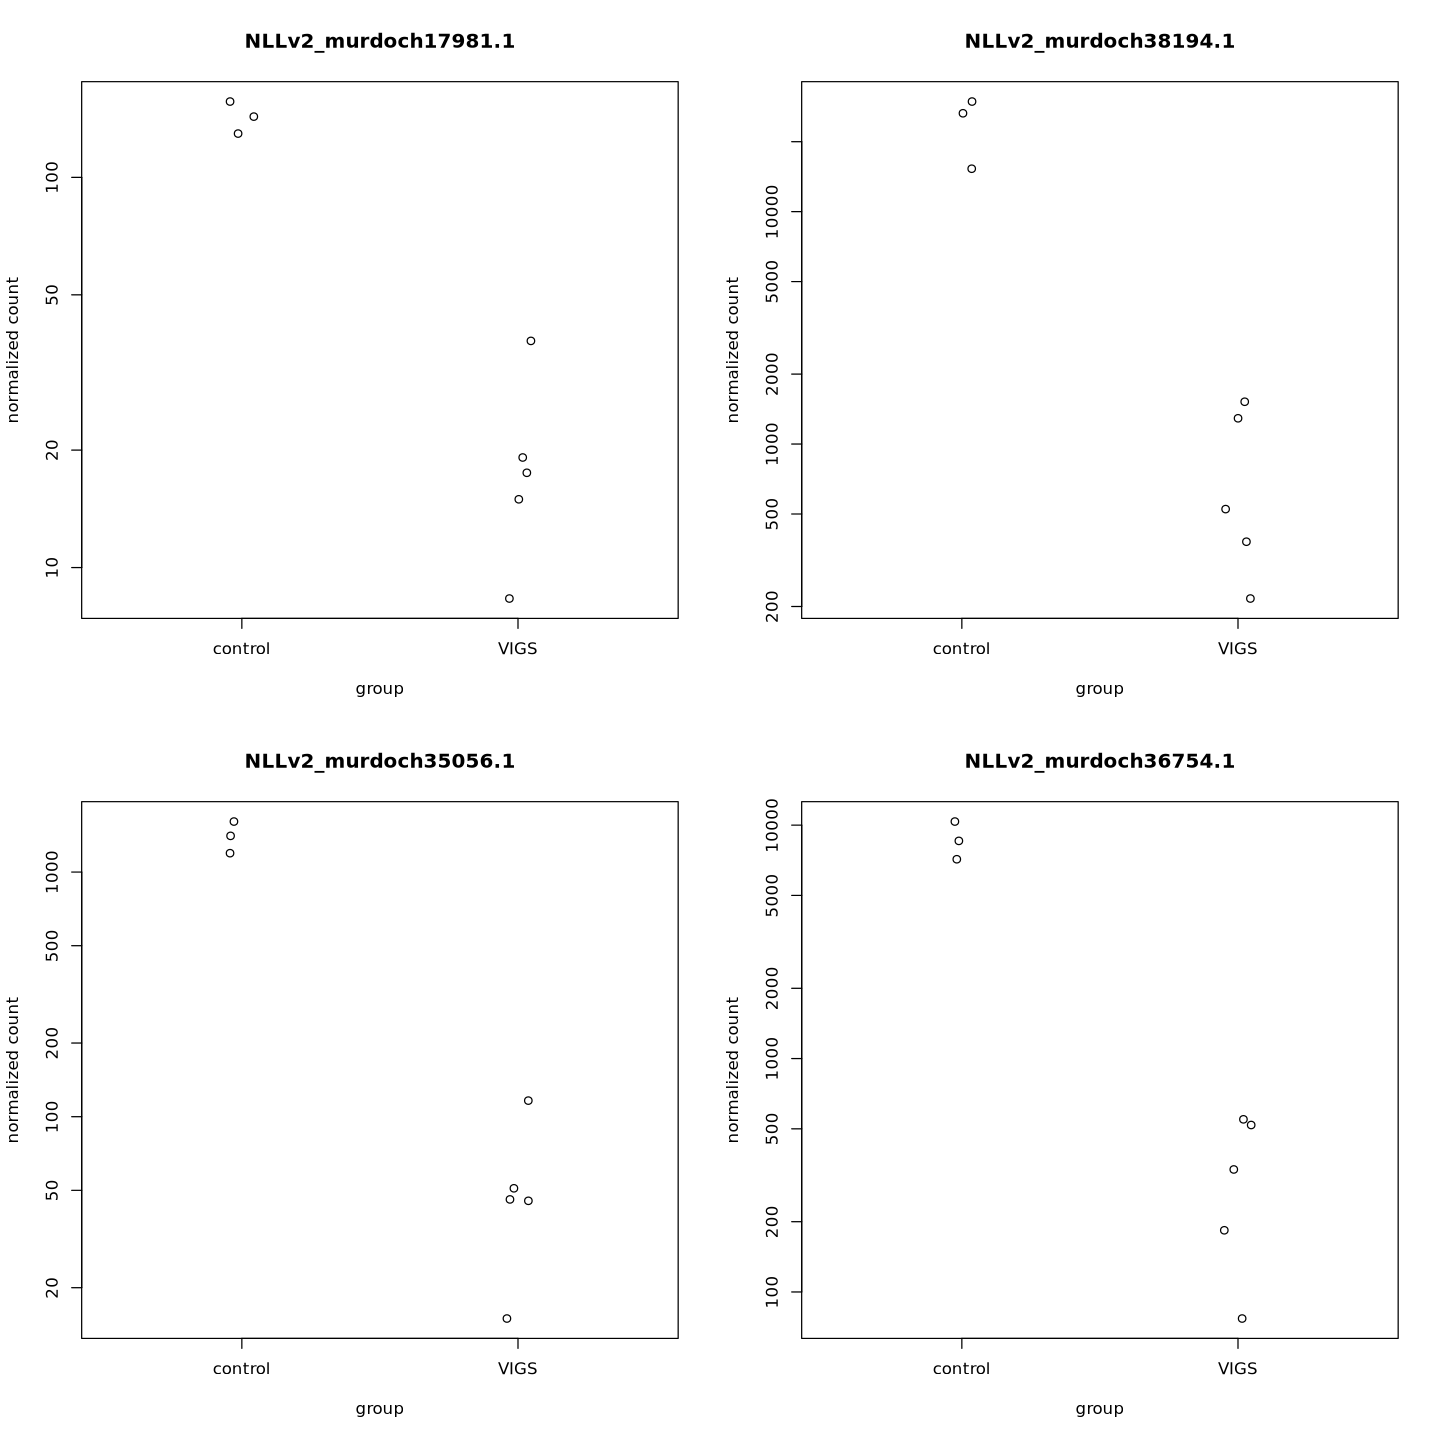

In [28]:
# Set the plot size
options(repr.plot.width=12, repr.plot.height=12)

#we can use plotCounts fxn to compare the normalized counts
#between treated and control groups for our top 6 genes
par(mfrow=c(2,2))

plotCounts(dds, gene="NLLv2_murdoch17981.1", intgroup="trait")
plotCounts(dds, gene="NLLv2_murdoch38194.1", intgroup="trait")
plotCounts(dds, gene="NLLv2_murdoch35056.1", intgroup="trait")
plotCounts(dds, gene="NLLv2_murdoch36754.1", intgroup="trait")

## Volvano plot

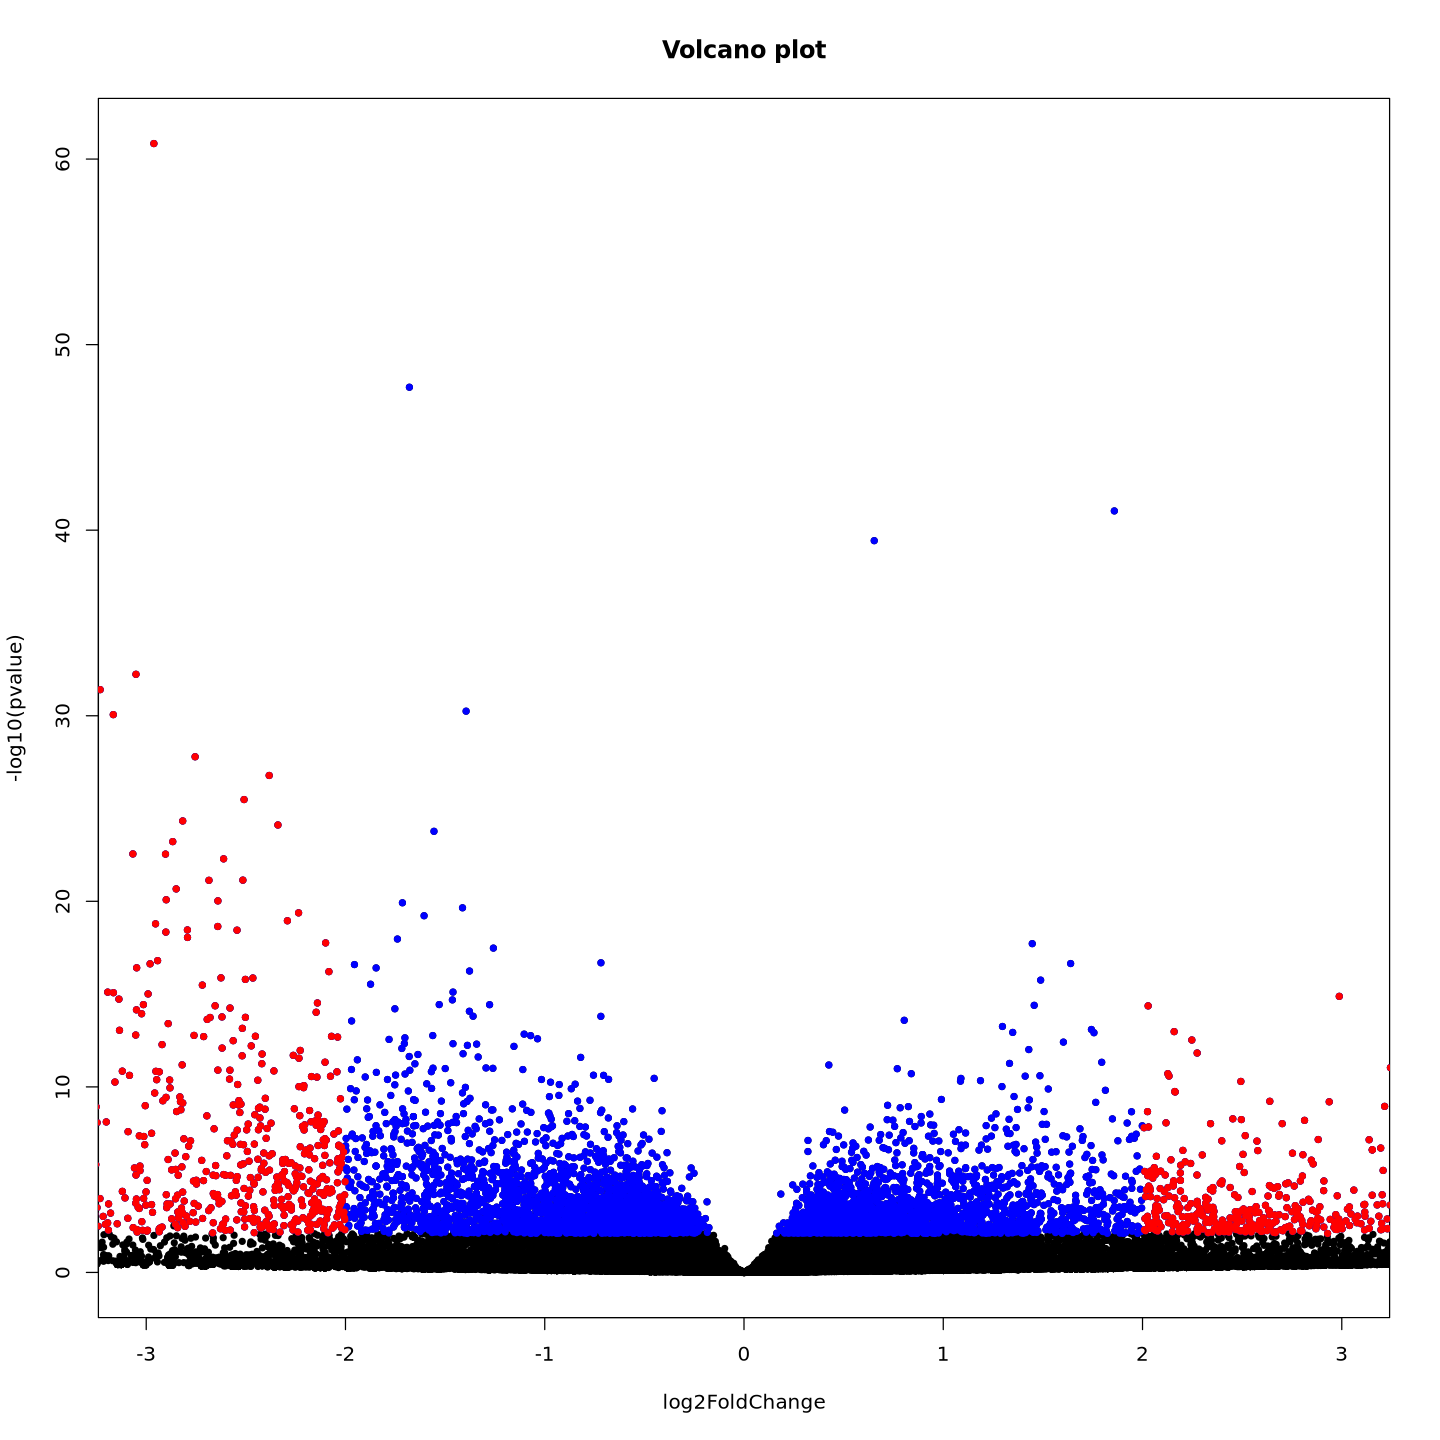

In [29]:
#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.05 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.05 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

## PCA

In [30]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation

vsdata <- vst(dds, blind=FALSE)

using ntop=500 top features by variance



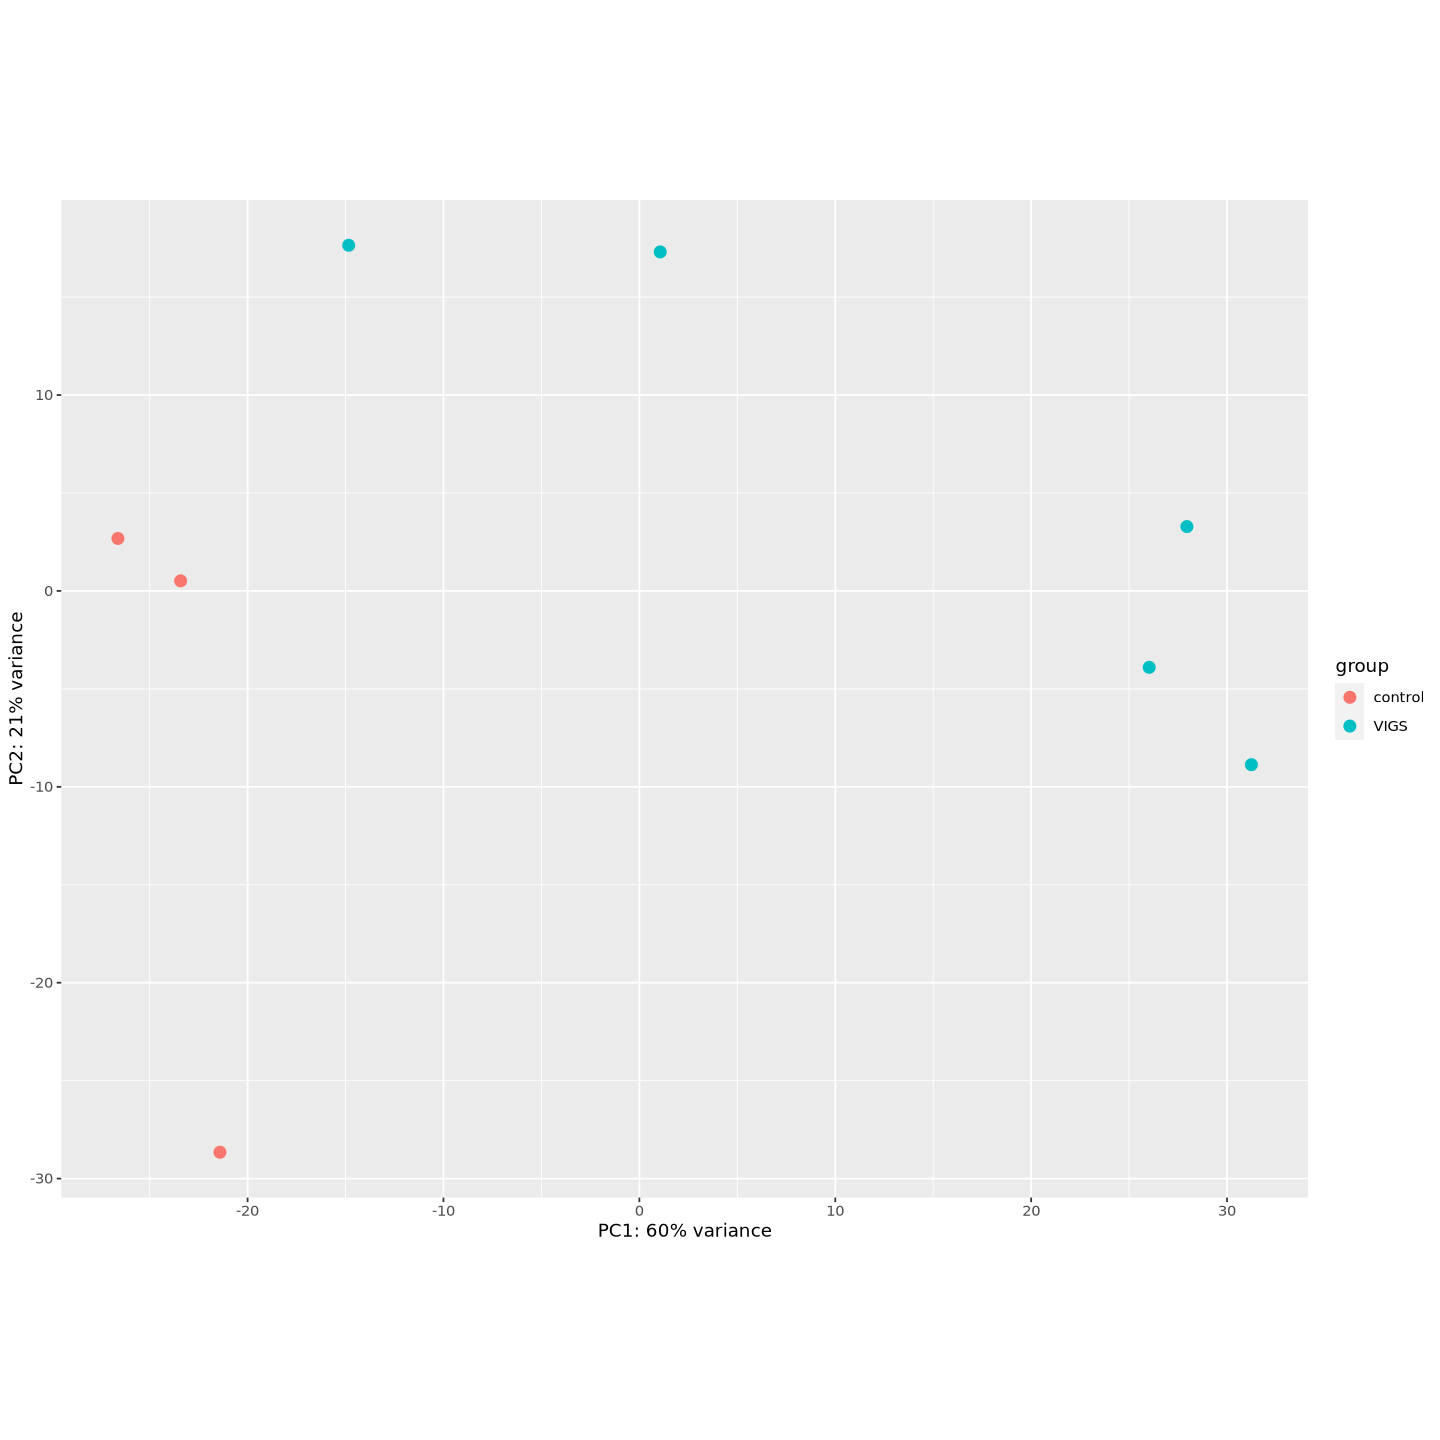

In [31]:
plotPCA(vsdata, intgroup="trait") #using the DESEQ2 plotPCA fxn we can